In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
from numpy.linalg import inv
from numpy import dot

#### Declare Variables 

In [2]:
nb_var_in = 2 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 40  #Number of datapoints

#### Generate Data 

In [3]:
A0 = np.array([[3], [2]])
#A0 = np.random.rand(nb_var_in, nb_var_out) - 0.5
X = np.random.rand(nb_data, nb_var_in)
Y = np.dot(X,A0) + np.random.normal(scale = 5e-1, size=(nb_data, nb_var_out))

#### Plot Data

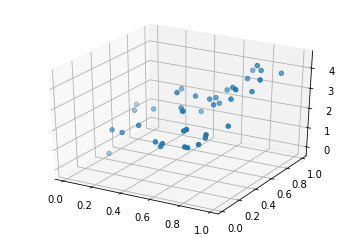

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y.flatten())

#### Calculate A using Standard LS

In [5]:
if nb_var_in > nb_var_out:
    A = dot(inv(dot(X.T,X)),dot(X.T, Y)) 
else:
    A = dot(X.T, dot(inv(dot(X,X.T)),Y))

#### Plot the plane corresponding to A, with the datapoints 

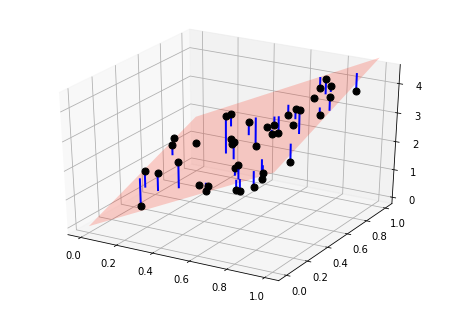

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
x = [0,1,1,0]
y = [0,0,1,1]
z = [0,dot(np.array([1,0]),A),dot(np.array([1,1]),A),dot(np.array([0,1]),A)]
verts = [list(zip(x,y,z))]
predicted_plane = Poly3DCollection(verts,alpha=0.2)

predicted_plane.set_facecolor([1.,0.1,0.])

ax.add_collection3d(predicted_plane)

for t in range(nb_data):
    ax.plot3D([X[t,0], X[t,0]], [X[t,1], X[t,1]], [Y[t,0], dot(X[t,:],A)], '-b', linewidth=2)
    ax.plot3D(X[t,0:1], X[t,1:2], Y[t,0:1], '.k', markersize=14)

plt.savefig('graphs/demo_LS01.png')